In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
y20= np.loadtxt('trackdata.txt')
y20.shape
# y20

(20, 2)

In [64]:
# plt.scatter(y20[:,0], y20[:,1]-y20[:,0])
# plt.show()

You can do anything in numpy that you would have done in Matlab.  One small caution:  make sure your arrays are of type Matrix instead of numpy arrays so that the multiplication operator * acts like a matrix multiply rather than an element-by-element multiply.  The default * operator for numpy arrays is equivalent to the Matlab .* element by element multiply.  

In [57]:
def kalman_update(x, P, y, R, G, Q, A, C):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    y: observed position measurement (same shape as C*x)
    R: measurement noise convariance matrix(same shape as C)
    Q: motion noise convariance matrix 
    A: next state function: x_prime = A*x+G*w
    C: measurement function: y = C*x+v

    Return: the updated new values for (x, P)
    '''
    # UPDATE x, P; x(t|t), P(t|t) based on measurement y   and x(t|t-1), P(t|t-1)
    S = C * P * C.T + R  # residual convariance
    K = P * C.T * S.I    # Kalman gain
    x = x + K*(y.T - C * x)#np.matrix(y)
    P = P - K*C*P
#     I = np.matrix(np.eye(A.shape[0])) # identity matrix
#     P = (I - K*C)*P

    return x, P

def kalman_predict(x, P, y, R, G, Q, A, C):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    y: observed position measurement (same shape as C*x)
    R: measurement noise convariance matrix(same shape as C)
    Q: motion noise convariance matrix 
    A: next state function: x_prime = A*x+G*w
    C: measurement function: y = C*x+v

    Return: the  predicted new values for (x, P)
    '''
    # PREDICT x(t+1|t), P(t+1|t) based after updated value x(t|t), P(t|t)
    x = A*x 
    P = A*P*A.T + G*Q*G.T

    return x, P

In [58]:
# np.matrix(np.eye(4))
# np.zeros((2, 4))
# x[[0,2]]

# y #array([-18.338,  -7.838])
# np.matrix(y)#matrix([[-18.338,  -7.838]])

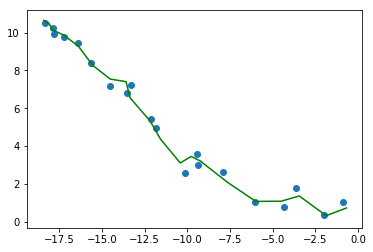

In [61]:
x = np.matrix(np.zeros((4, 1)))
P = np.matrix(np.eye(4)) # initial uncertainty
Q = 0.09*np.matrix(np.eye(2))
R = 0.16*np.matrix(np.eye(2))
G=np.matrix([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 0.,  1.]])
A=np.matrix([[ 1.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  1.]])
C=np.matrix([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.]])

result = []    
for y in y20:
    y=np.matrix(y)# row matrix
    x, P = kalman_update(x, P, y, R, G, Q, A, C)
    result.append((x[[0,2]]).tolist())
    x, P = kalman_predict(x, P, y, R, G, Q, A, C)
kalman_x, kalman_y = zip(*result)
plt.plot(kalman_x, kalman_y, 'g-')
plt.scatter(y20[:,0], y20[:,1]-y20[:,0])
plt.show()

# green line is Kalman filter

# blue scatter is my own naive guess using the combination of y

# similar result but Kalman filter may offer more, e.g., 2nd and 4th state which are not directly measurable from y, but 2nd and 4th state affected 1st and 3rd state which also affect output y

In [62]:
x

matrix([[-18.81130598],
        [ -0.39088188],
        [ 10.99307678],
        [  0.33477848]])

## Reference: other shared code
## https://stackoverflow.com/questions/13901997/kalman-2d-filter-in-python

In [38]:
# import numpy as np
# import matplotlib.pyplot as plt

# def kalman_xy(x, P, measurement, R,
#               motion = np.matrix('0. 0. 0. 0.').T,
#               Q = np.matrix(np.eye(4))):
#     """
#     Parameters:    
#     x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
#     P: initial uncertainty convariance matrix
#     measurement: observed position
#     R: measurement noise 
#     motion: external motion added to state vector x
#     Q: motion noise (same shape as P)
#     """
#     return kalman(x, P, measurement, R, motion, Q,
#                   F = np.matrix('''
#                       1. 0. 1. 0.;
#                       0. 1. 0. 1.;
#                       0. 0. 1. 0.;
#                       0. 0. 0. 1.
#                       '''),
#                   H = np.matrix('''
#                       1. 0. 0. 0.;
#                       0. 1. 0. 0.'''))

# def kalman(x, P, measurement, R, motion, Q, F, H):
#     '''
#     Parameters:
#     x: initial state
#     P: initial uncertainty convariance matrix
#     measurement: observed position (same shape as H*x)
#     R: measurement noise (same shape as H)
#     motion: external motion added to state vector x
#     Q: motion noise (same shape as P)
#     F: next state function: x_prime = F*x
#     H: measurement function: position = H*x

#     Return: the updated and predicted new values for (x, P)

#     See also http://en.wikipedia.org/wiki/Kalman_filter

#     This version of kalman can be applied to many different situations by
#     appropriately defining F and H 
#     '''
#     # UPDATE x, P based on measurement m    
#     # distance between measured and current position-belief
#     y = np.matrix(measurement).T - H * x
#     S = H * P * H.T + R  # residual convariance
#     K = P * H.T * S.I    # Kalman gain
#     x = x + K*y
#     I = np.matrix(np.eye(F.shape[0])) # identity matrix
#     P = (I - K*H)*P

#     # PREDICT x, P based on motion
#     x = F*x + motion
#     P = F*P*F.T + Q

#     return x, P

# def demo_kalman_xy():
#     x = np.matrix('0. 0. 0. 0.').T 
#     P = np.matrix(np.eye(4))*1000 # initial uncertainty

#     N = 20
#     true_x = np.linspace(0.0, 10.0, N)
#     true_y = true_x**2
#     observed_x = true_x + 0.05*np.random.random(N)*true_x
#     observed_y = true_y + 0.05*np.random.random(N)*true_y
#     plt.plot(observed_x, observed_y, 'ro')
#     result = []
#     R = 0.01**2
#     for meas in zip(observed_x, observed_y):
#         x, P = kalman_xy(x, P, meas, R)
#         result.append((x[:2]).tolist())
#     kalman_x, kalman_y = zip(*result)
#     plt.plot(kalman_x, kalman_y, 'g-')
#     plt.show()

# demo_kalman_xy()